<a href="https://colab.research.google.com/github/ValarieMello/CSCI580_VTM/blob/main/A5_Perception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#load in the file
from google.colab import files
uploaded = files.upload()
#bring in needed libraries
import numpy as np
import matplotlib.pyplot as plt

#load in and split the data
data = np.loadtxt("data.csv", delimiter=",")
# X = all input features (all columns except the last one)
# y = labels (last column, converted to integers)
x = data[:, :-1]
y = data[:, -1].astype(int)

print("Data loaded:", data.shape)

Saving data.csv to data (8).csv
Data loaded: (100, 3)


Valarie Mello

Artifical Intelligence

Assignment 5: Perception

**Part 1: Heurstic Approach**

Tasks:
*  Plot data from data.csv
*  Implement perceptron using the heuristic
approach
*  Plot the initial separation line as red,
subsequent ones after each iteration in
dashed green, and the last one in black
*  Play with the learning rate
* Analyze the results in the report

**Psudocode**
1. Start a perceptron with random weights and
bias: w 1
, w 2
, ..., w n
, b
2. For each of all points (data) with their
corresponding labels (answers):
2.1. Classify according to the perceptron
2.2. For a misclassified point (x 1
,x 2
, ..., x n
) :
2.2.1. If classification==0:
2.2.1.1. b + r → b
2.2.1.2. For all w i
: wi + rx i → wi
2.2.2. If classification==1:
2.2.2.1. b - r → b
2.2.2.2. For all w i
: wi - rx i → wi
3. Repeat #2 enough number of times

**Earlier heuristic approach with binary classification**

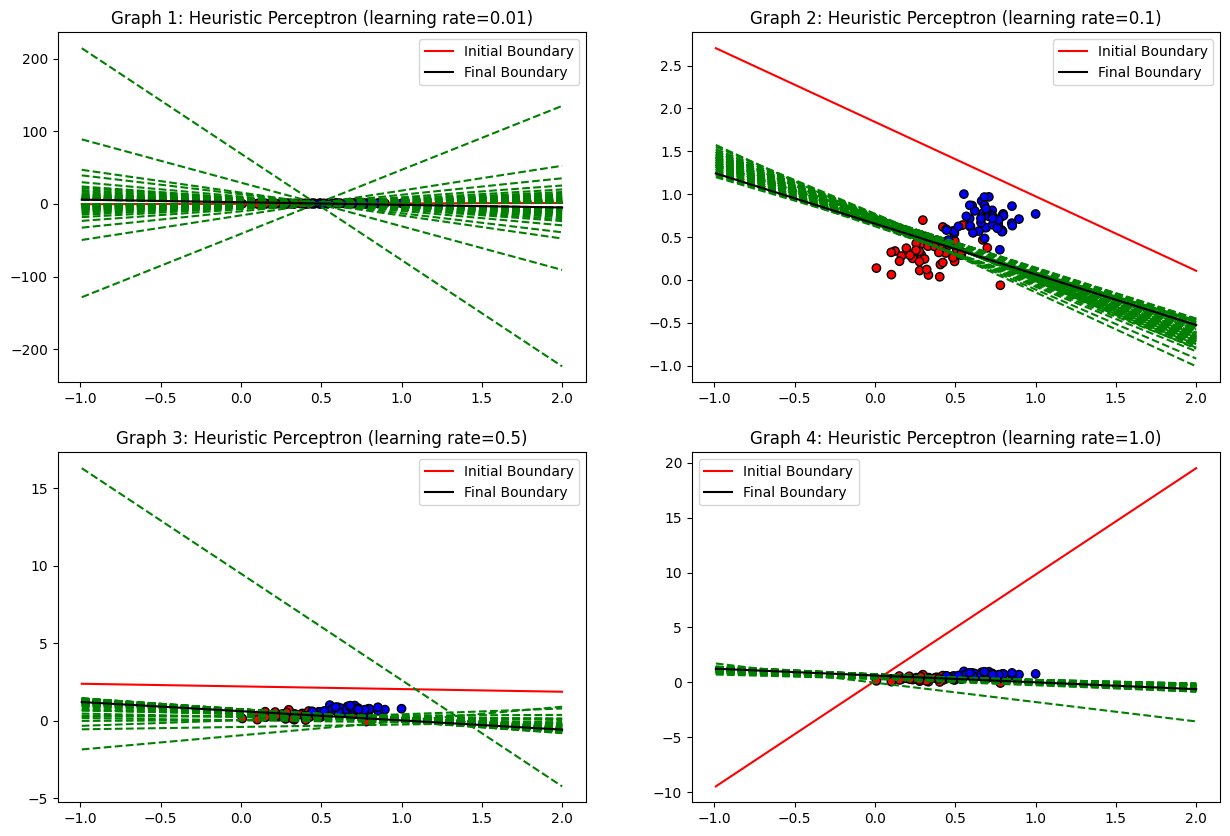

In [77]:
#graph helper function
def plot_line(weight, bias, style="-", color="black", label=None):
    # Create 2 x-range values for plotting the line
    x_vals = np.array([min(x[:,0]) - 1, max(x[:,0]) + 1])
    y_vals = -(weight[0] * x_vals + bias) / weight[1]
    plt.plot(x_vals, y_vals, linestyle=style, color=color, label=label)

#function for the huristic method
def heuristic_perceptron(x, y, lr, iterations):
    #get how many columns
    n_features = x.shape[1]

    #Start a perceptron with random weights and bias
    weight = np.random.randn(n_features)
    bias = np.random.randn()

    #Plot initial boundary using red
    plot_line(weight, bias, "-", "red", label="Initial Boundary")

    #For each of all points (data) with their corresponding labels (answers):
    for j in range(iterations):
        for i in range(len(x)):
            x_i = x[i]
            label = y[i]

            #Classify according to perceptron
            pred = 1 if (np.dot(weight, x_i) + bias) >= 0 else 0

            #If misclassified:
            if pred != label:
                #If classificaton == 0
                if pred == 0:
                    #b + r -> b
                    bias = bias + lr
                    #wi + r*xi -> wi  (for all weights)
                    weight = weight + lr * x_i
                #If classification == 1
                else:
                    #b - r -> b
                    bias = bias - lr
                    #wi - r*xi -> wi
                    weight = weight - lr * x_i

        #Plot boundary after each full pass over the data in green
        plot_line(weight, bias, "--", "green")

    #graph the final boundary in black
    plot_line(weight, bias, "-", "black", label="Final Boundary")

    return weight, bias

#plot out the whole figure to be shown in report
#learning rate varibles
learning_rates = [0.01, 0.1, 0.5, 1.0]

plt.figure(figsize=(15,10))
#for loop for each of our values in learning rates
#use enumerate so we can use i and get our learning rate values
for i, lr in enumerate(learning_rates, start=1):
    #show the 4 plots
    plt.subplot(2, 2, i)
    # Plot training data
    plt.scatter(x[:,0], x[:,1], c=y, cmap="bwr", edgecolors="k")
    #call the herusitic perception
    weight_final, bias_final = heuristic_perceptron(x, y, lr=lr, iterations=65)
    plt.title(f"Graph {i}: Heuristic Perceptron (learning rate={lr})")
    plt.legend()
plt.show()

**Write Up**

I decied to go with 4 differnt learning rates and copied from your example of using 65 iterations.



To review:
the red line represents our intial boundary, the green is from each iteration(65 in our case) and the black line is the final. As the learning rate increases we see a shift from very slow and caustious learning to a very fast and eratic learning. this can be observed very well with Graph 1 which makes a fan shape that is evenly spaced but going in 2 oposite directions. by constrast our higher learning rates in graphs 2 and 3 show a more moderate learning behavior that is more evenly spaced and more closly follows the black line. Graph 4 shows the most eratic behavior. While the graph follows the black line very well for the most part there are many lines that randomly off shoot going in random directions.


Because of all of these factors it seems that the learning rates with the most sucess are **0.1 and 0.5** which are moderate in their speed and lead to the least amount of randomness and most accuratly follow the final boundary. I saw this pattern repeated even when refreshing the graph over and over again.

**Part 2: Gradient Descent Approach**

**Tasks:**
*   Plot data from data.csv
*   Implement perceptron using the Gradient
Descent approach
*   Play with learning rate, number of epochs.
*   Plot the initial separation line as red,
subsequent ones after each iteration in
dashed green, and the last one in black
*  Compute log loss (error) and plot the error
graph every 10 epoch (see page 5)
*  Analyze the results in the report

**Psudocode**

1. Start a perceptron with random weights
and bias: w 1
, w 2
, ..., w n , b
2. For each of all points (data) with their
corresponding labels (answers):
2.1. Compute prediction output (ŷ)
2.2. Compute error function (y - ŷ)
2.3. b + r(y - ŷ) → b
2.4. For all w i : w i + r(y - ŷ)x i → w i
3. Repeat #2 until error is small


**Note: ŷ is no longer 0 or 1 from a step function.**
